In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import Counter
from wordcloud import WordCloud



In [2]:
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

In [3]:
df = pd.read_csv('data/dataset_processed.csv')

**Analisis Exploratorio de Features**

C:\Users\jayka\AppData\Local\Temp\ipykernel_21780\3423066480.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette=palette)


Text(0.5, 1.0, 'Artistas con mayor popularidad total')

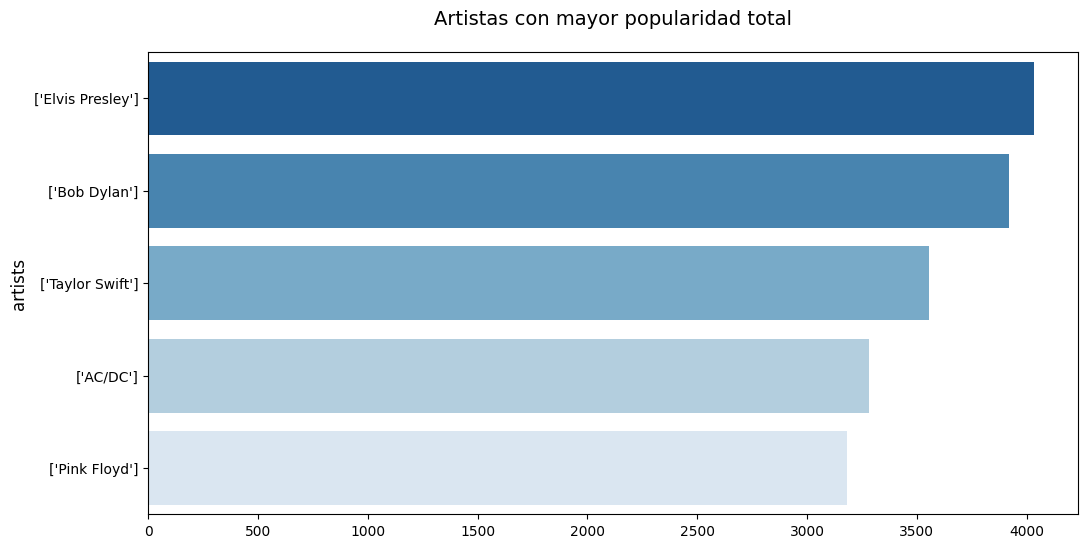

In [4]:
top_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(5)
palette = sns.color_palette("Blues", n_colors=len(top_artists))[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette=palette)
plt.title("Artistas con mayor popularidad total", pad=20)



C:\Users\jayka\AppData\Local\Temp\ipykernel_21780\946662612.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index, y=decade_counts.values, palette=palette)


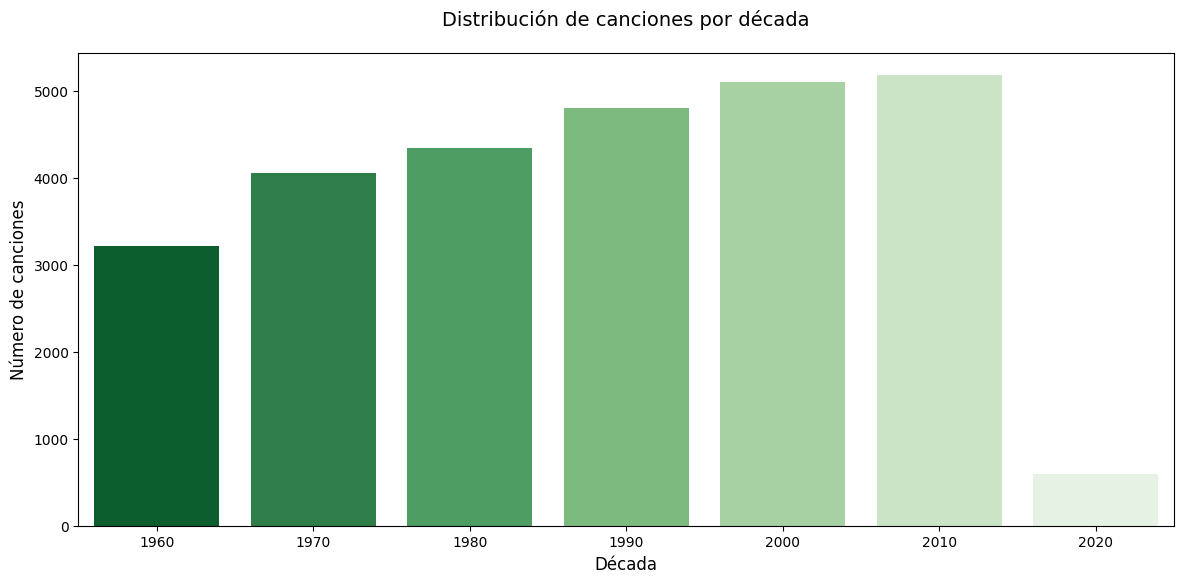

In [5]:
decade_counts = df['decade'].value_counts().sort_index()

palette = sns.color_palette("Greens", n_colors=len(decade_counts))[::-1]

plt.figure(figsize=(12, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values, palette=palette)

plt.title("Distribución de canciones por década", pad=20)
plt.xlabel("Década")
plt.ylabel("Número de canciones")
plt.tight_layout()
plt.show()


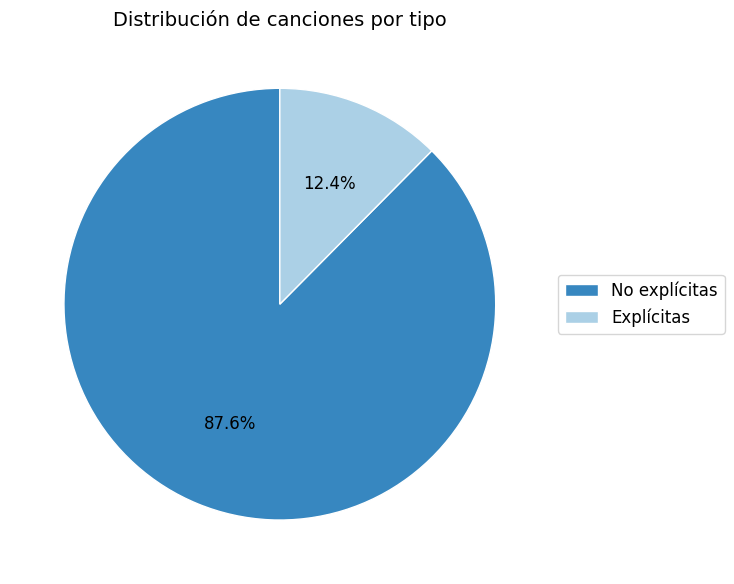

In [6]:
explicit_counts = df['explicit'].value_counts().sort_index()
labels = ['No explícitas', 'Explícitas']

palette = sns.color_palette("Blues", n_colors=2)[::-1]

plt.figure(figsize=(12, 6))

wedges, texts, autotexts = plt.pie(
    explicit_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=palette,
    textprops={'fontsize': 12},
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
)

plt.legend(
    wedges,
    labels,
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=12,
)

plt.title("Distribución de canciones por tipo", fontsize=14, loc='center')
plt.tight_layout()
plt.show()


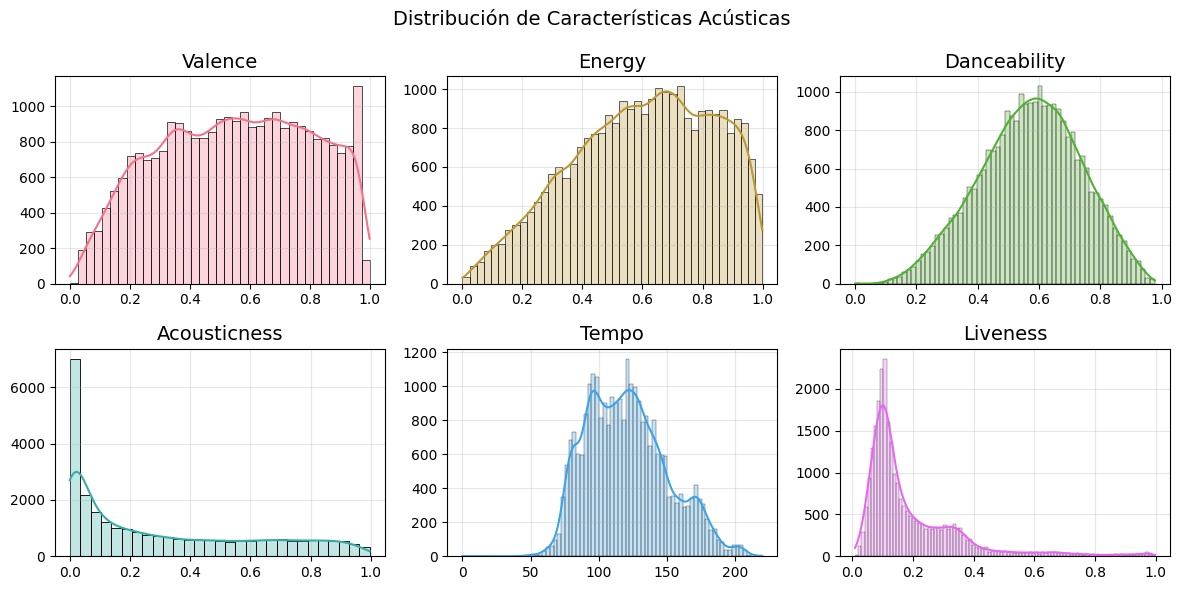

In [7]:
# Crear figura para distribuciones
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
fig.suptitle('Distribución de Características Acústicas', fontsize=14)

features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'liveness']
palette = sns.color_palette("husl", n_colors=len(features))

for i, (ax, feature) in enumerate(zip(axes.flat, features)):
    sns.histplot(data=df, x=feature, kde=True, ax=ax, color=palette[i], alpha=0.3)
    ax.set_title(feature.capitalize())
    ax.grid(True, alpha=0.3)
    ax.set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()

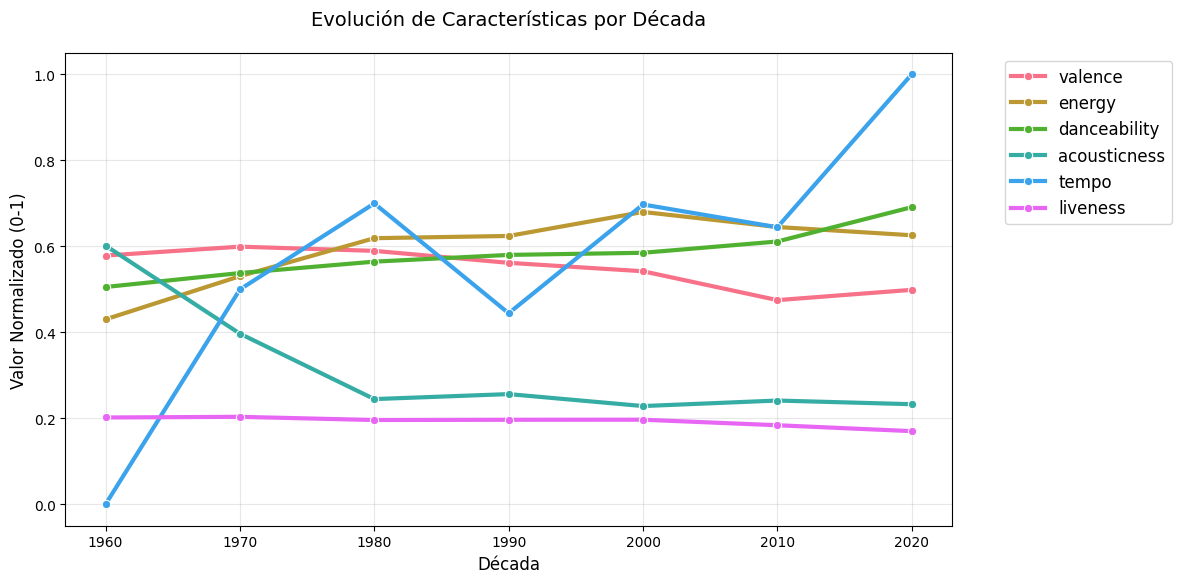

In [8]:
decade_means = df.groupby('decade')[features].mean().reset_index()
decade_means_normalized = decade_means.copy()
if 'tempo' in features:
    min_val = decade_means['tempo'].min()
    max_val = decade_means['tempo'].max()
    decade_means_normalized['tempo'] = (decade_means['tempo'] - min_val) / (max_val - min_val)

plt.figure(figsize=(12, 6))
palette = sns.color_palette("husl", n_colors=len(features))
for idx, feature in enumerate(features):
    sns.lineplot(data=decade_means_normalized, x='decade', y=feature,
                 marker='o', linewidth=3, label=feature,
                 color=palette[idx])

plt.title('Evolución de Características por Década', pad=20)
plt.xlabel('Década')
plt.ylabel('Valor Normalizado (0-1)')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

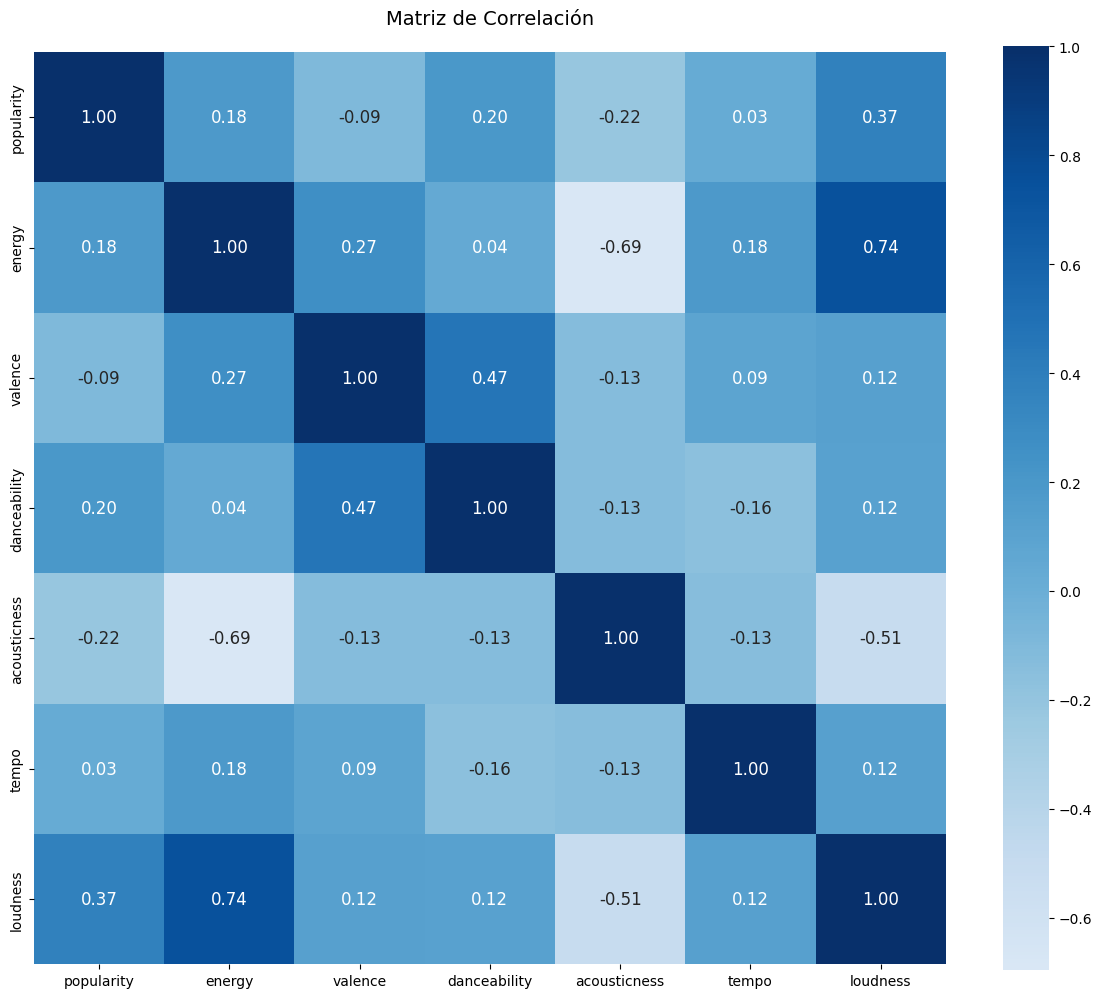

In [9]:
corr_features = ['popularity', 'energy', 'valence', 'danceability', 'acousticness', 'tempo', 'loudness']
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='Blues', 
            center=0,
            fmt='.2f',
            square=True,)
plt.title('Matriz de Correlación', pad=20)
plt.tight_layout()
plt.show()

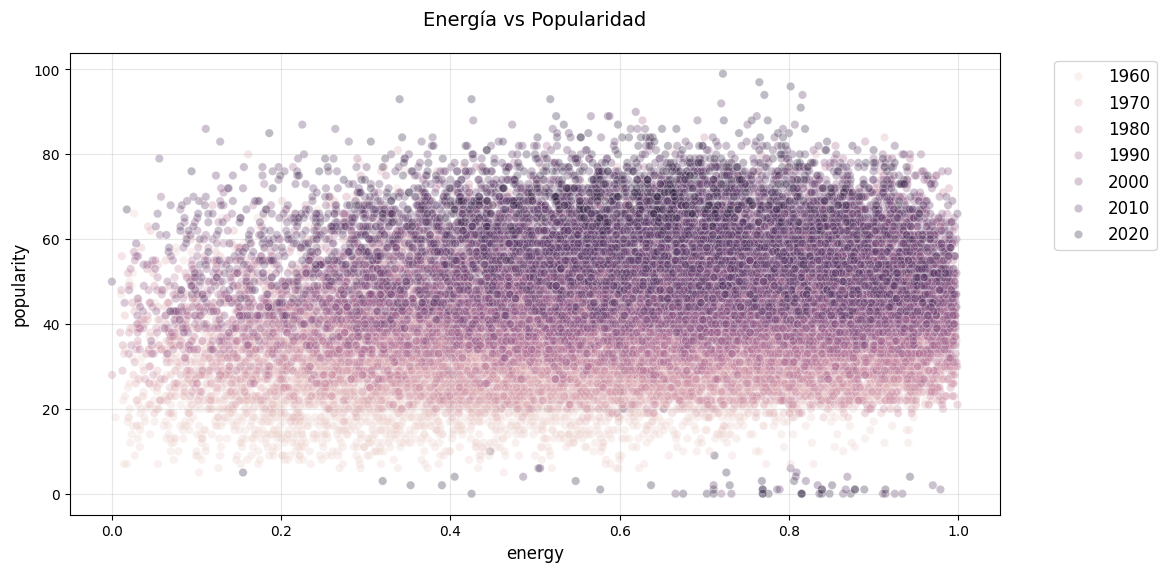

In [10]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='energy', y='popularity', hue='decade', alpha=0.3)
plt.title('Energía vs Popularidad', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

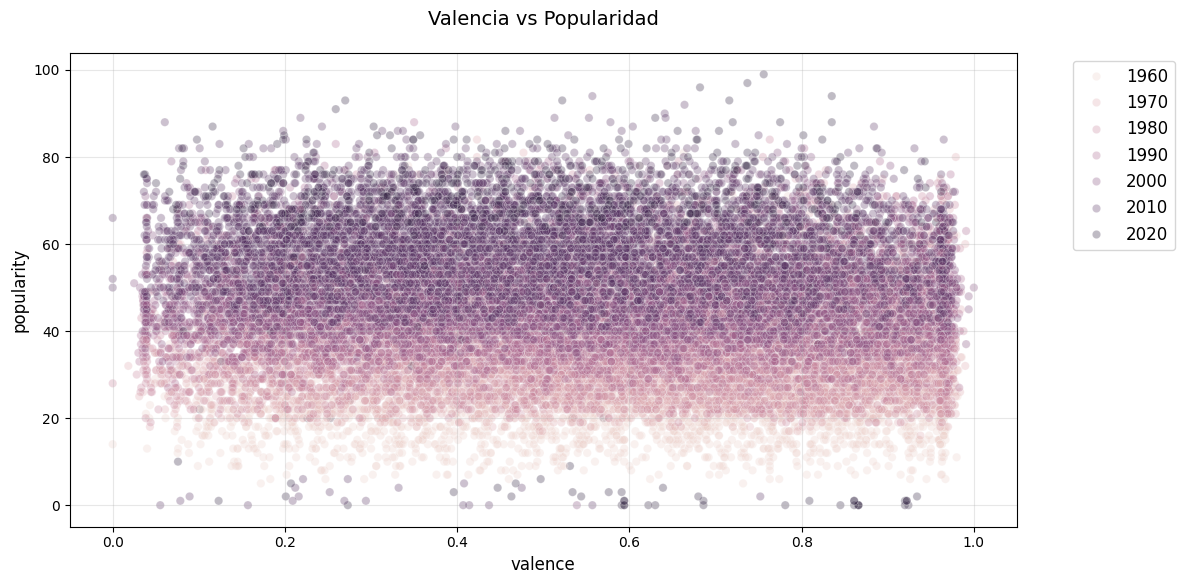

In [11]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='valence', y='popularity', hue='decade', alpha=0.3)
plt.title('Valencia vs Popularidad', pad=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

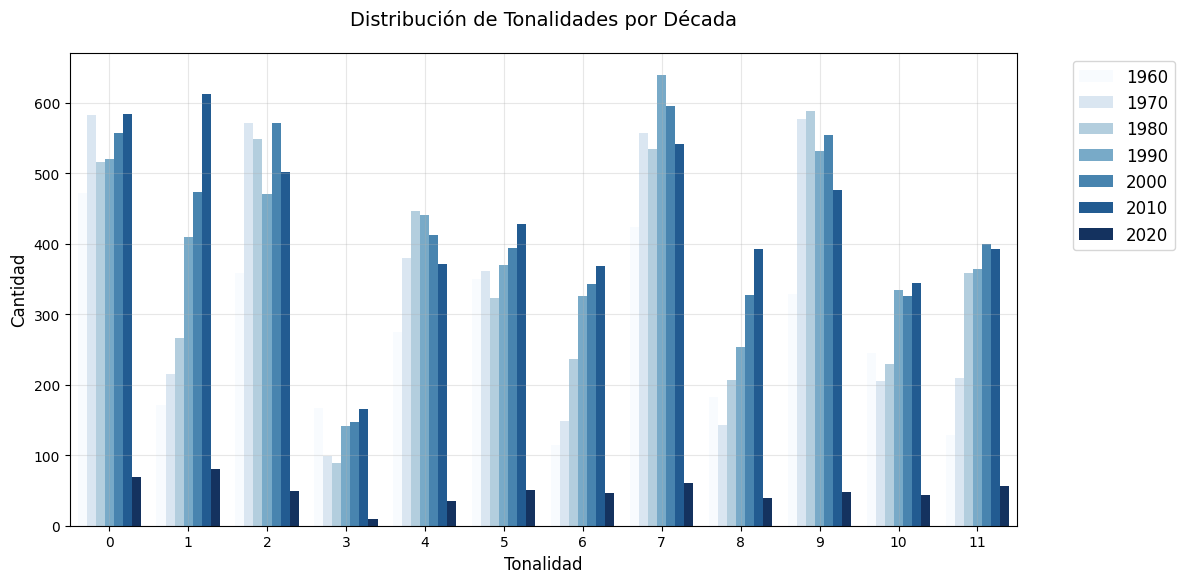

In [12]:
# Distribución de tonalidades por década
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='key', hue='decade', palette='Blues')
plt.title('Distribución de Tonalidades por Década', pad=20)
plt.xlabel('Tonalidad')
plt.ylabel('Cantidad')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

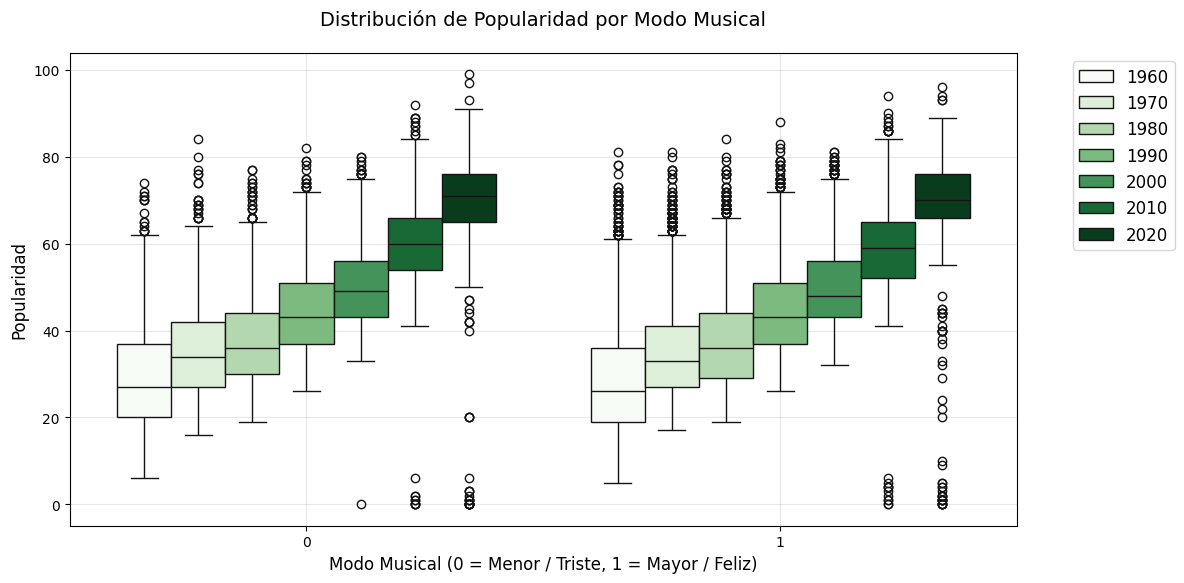

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mode', y='popularity', palette='Greens', hue='decade')
plt.title('Distribución de Popularidad por Modo Musical', pad=20)
plt.xlabel('Modo Musical (0 = Menor / Triste, 1 = Mayor / Feliz)')
plt.ylabel('Popularidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

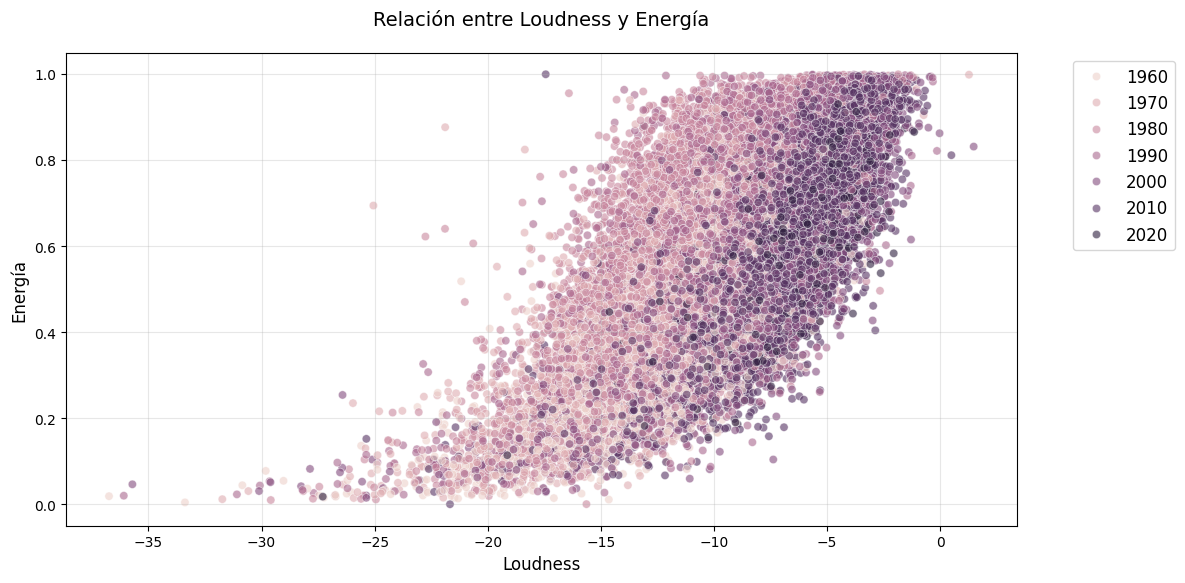

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='loudness', y='energy', hue='decade', alpha=0.6)
plt.title('Relación entre Loudness y Energía', pad=20)
plt.xlabel('Loudness')
plt.ylabel('Energía')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Analisis Exploratorio de Textos**

In [15]:
df['tokens'] = df['tokens'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

C:\Users\jayka\AppData\Local\Temp\ipykernel_21780\841645741.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w, _ in top_words], y=[c for _, c in top_words], palette="Blues_r")


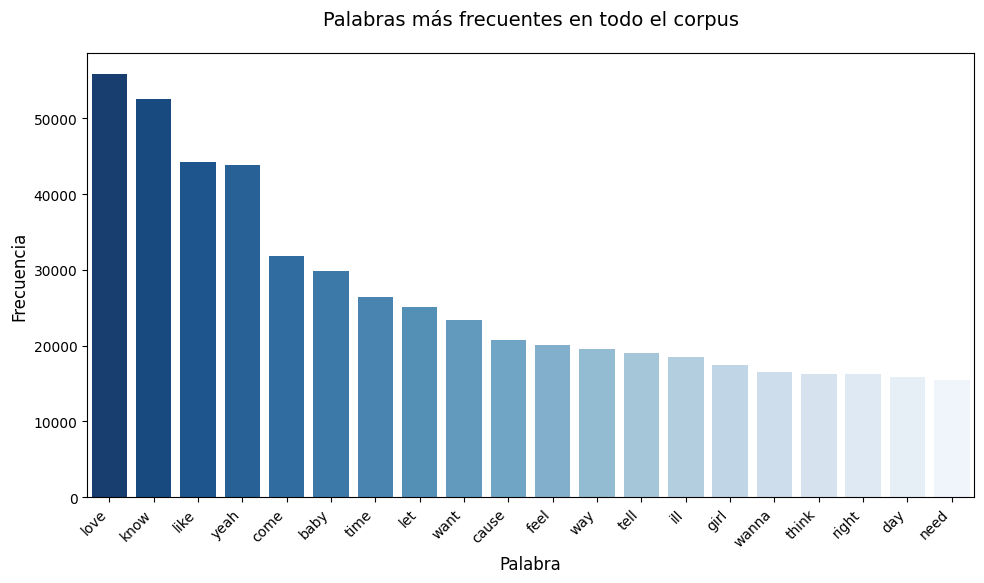

In [16]:
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_counts = Counter(all_tokens)
top_words = word_counts.most_common(20)

plt.figure(figsize=(10,6))
sns.barplot(x=[w for w, _ in top_words], y=[c for _, c in top_words], palette="Blues_r")
plt.xticks(rotation=45, ha='right')
plt.title("Palabras más frecuentes en todo el corpus", loc='center', pad=20)
plt.xlabel("Palabra")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


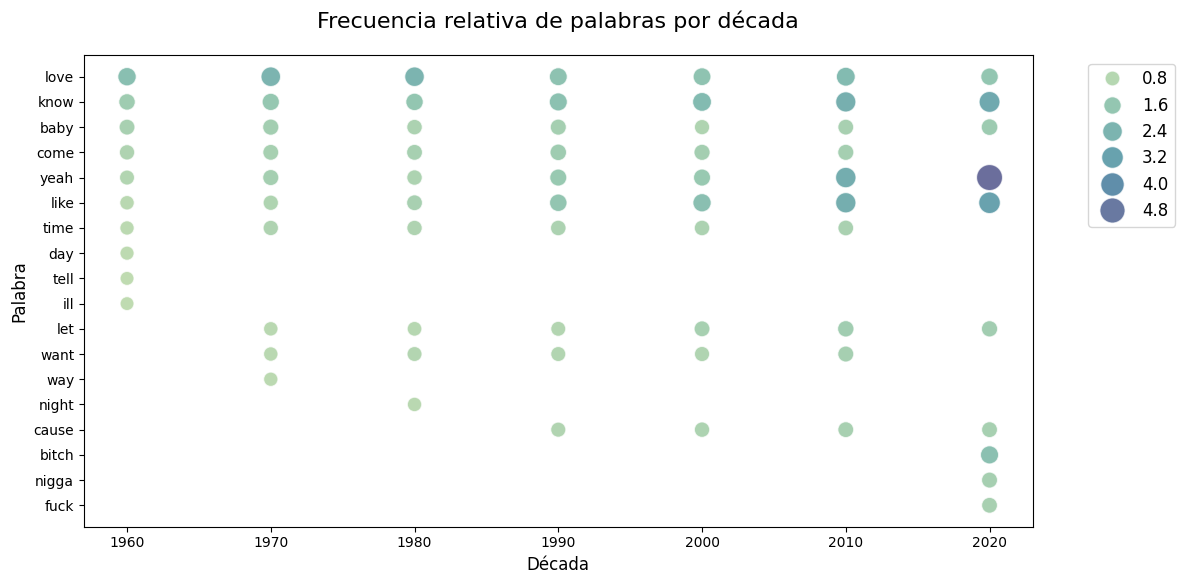

In [17]:
def top_words_bubble(df, top_n=10):
    data = []
    decades = sorted(df['decade'].unique())
    
    for dec in decades:
        subset = df[df['decade'] == dec]
        tokens = [t for tokens in subset['tokens'] for t in tokens]
        top = Counter(tokens).most_common(top_n)
        total = len(subset)
        for word, count in top:
            data.append({'década': dec, 'palabra': word, 'frecuencia': count/total})
    
    freq_df = pd.DataFrame(data)

    plt.figure(figsize=(12,6))
    sns.scatterplot(
        data=freq_df, x='década', y='palabra',
        size='frecuencia', hue='frecuencia',
        sizes=(100, 350), palette='crest', alpha=0.7, legend='brief'
    )
    plt.title("Frecuencia relativa de palabras por década", fontsize=16, pad=20)
    plt.xlabel("Década")
    plt.ylabel("Palabra")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

top_words_bubble(df)

C:\Users\jayka\AppData\Local\Temp\ipykernel_21780\2390947520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w,_ in top_t], y=[c for _,c in top_t], palette="Blues_r" if label else "Greens_r")


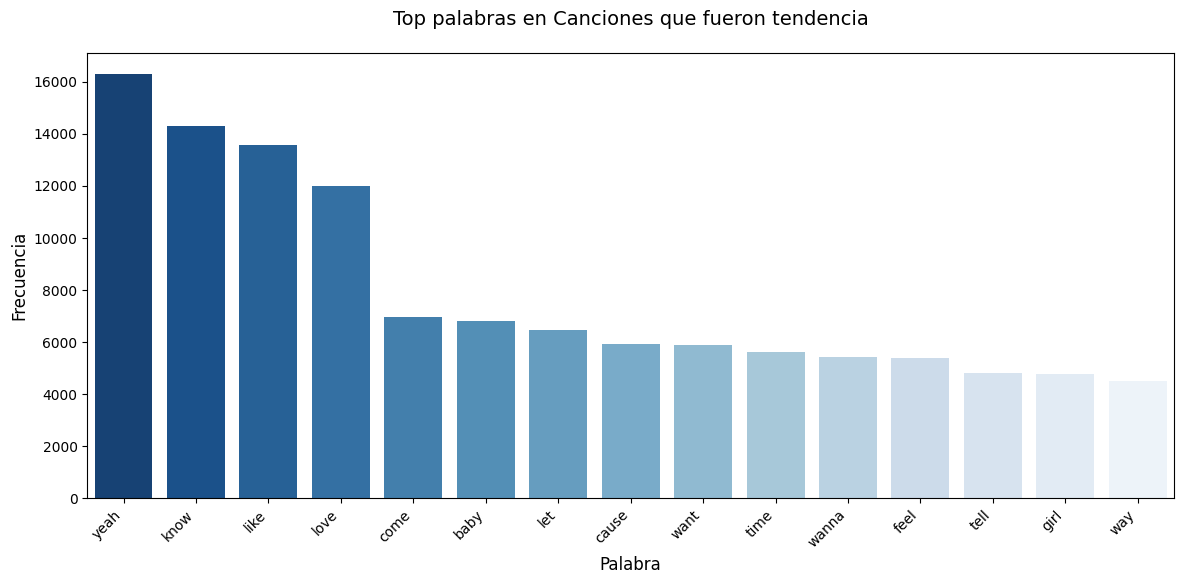

C:\Users\jayka\AppData\Local\Temp\ipykernel_21780\2390947520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w for w,_ in top_t], y=[c for _,c in top_t], palette="Blues_r" if label else "Greens_r")


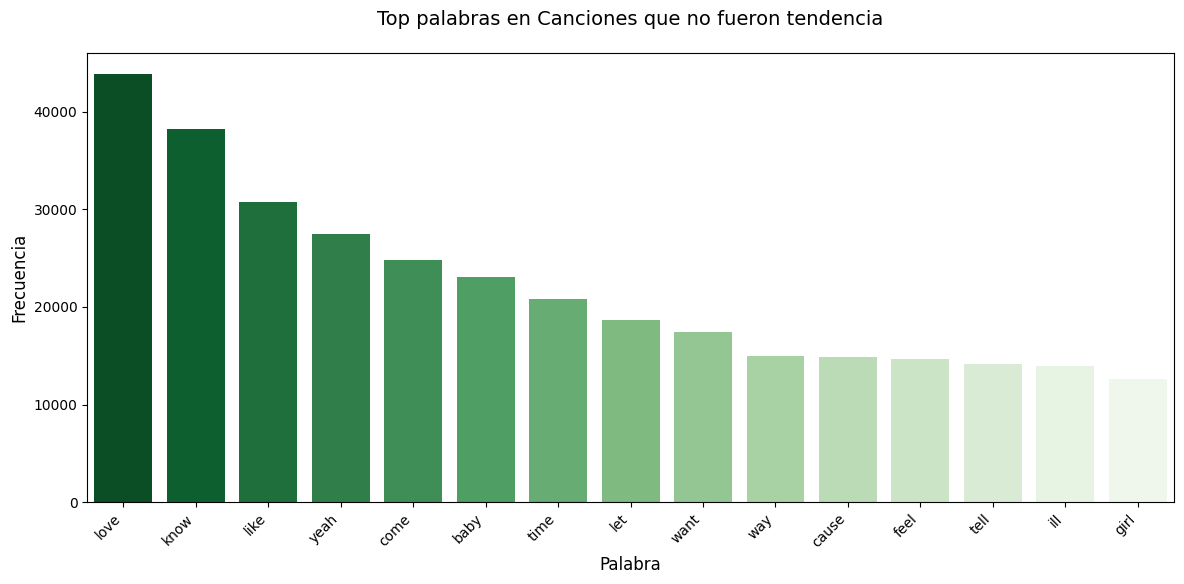

In [18]:
for label, title in zip([1, 0], ["Canciones que fueron tendencia", "Canciones que no fueron tendencia"]):
    subset = df[df['was_trending'] == label]
    all_tokens = [t for tokens in subset['tokens'] for t in tokens]
    top_t = Counter(all_tokens).most_common(15)
    
    plt.figure(figsize=(12,6))
    sns.barplot(x=[w for w,_ in top_t], y=[c for _,c in top_t], palette="Blues_r" if label else "Greens_r")
    plt.title(f"Top palabras en {title}", loc='center', pad=20)
    plt.xlabel("Palabra")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


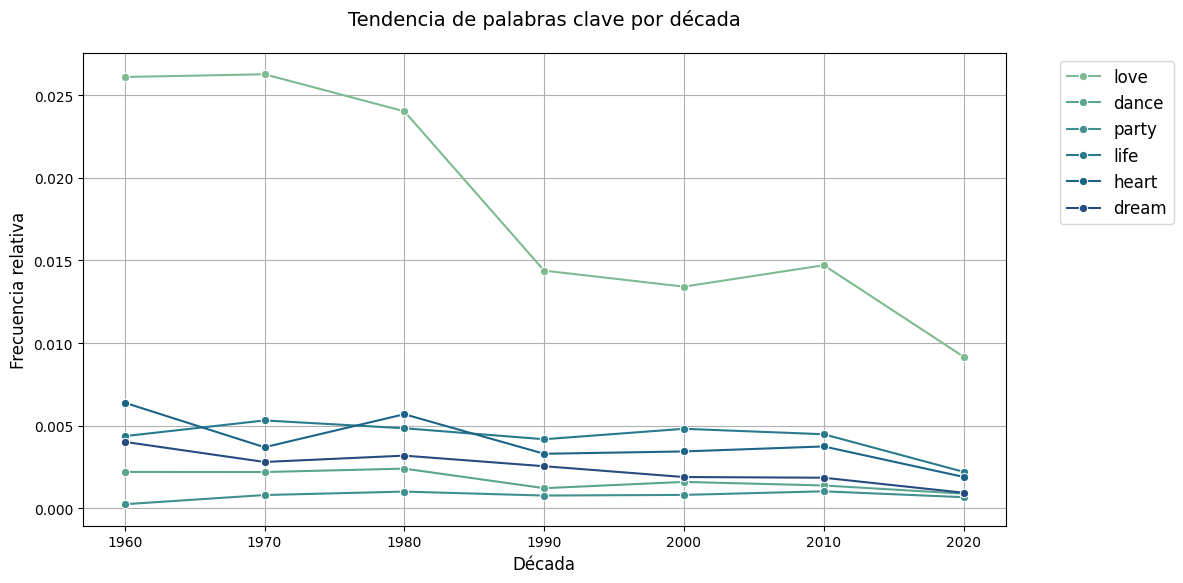

In [19]:
keywords = ['love', 'dance', 'party', 'life', 'heart', 'dream']
trend_data = []

for dec in sorted(df['decade'].unique()):
    subset = df[df['decade'] == dec]
    all_tokens = [t for tokens in subset['tokens'] for t in tokens]
    counts = Counter(all_tokens)
    total = sum(counts.values())
    for word in keywords:
        trend_data.append({'decade': dec, 'word': word, 'freq': counts[word]/total})

trend_df = pd.DataFrame(trend_data)

plt.figure(figsize=(12,6))
sns.lineplot(data=trend_df, x='decade', y='freq', hue='word', marker="o", palette="crest")
plt.title("Tendencia de palabras clave por década", loc='center', pad=20)
plt.xlabel("Década")
plt.ylabel("Frecuencia relativa")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


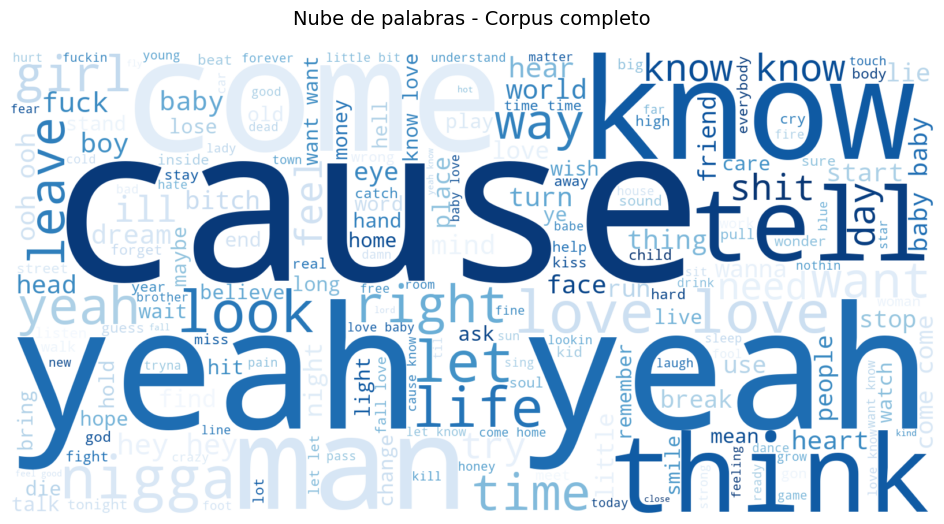

In [20]:
all_tokens = [t for tokens in df['tokens'] for t in tokens]
text = " ".join(all_tokens)

wordcloud = WordCloud(width=1600, height=800, background_color="white", colormap="Blues").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras - Corpus completo", loc='center', pad=20)
plt.show()
